In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [2]:
from olist.seller import Seller
from olist.product import Product

import warnings
warnings.filterwarnings('ignore')

In [3]:
from olist.data import Olist
olist = Olist()
data = olist.get_data()

a=3157.27
b=978.23

# How Can Olist Increase Profit?

## Profit = Revenues - Costs

### a. Maximize revenues

### b. Minimize costs

## Revenues:

### 10% cut on every sale

### Subscription fees: 80 BRL per month per seller

## Costs:

### Reputation costs

#### Unfavorable reviews cost Olist an estimated:
####      40 BRL per '3 star' review
####      50 BRL per '2 star' review
####      100 BRL per '1 star' review

### IT costs:

#### $IT\_costs = \alpha * \sqrt{n\_sellers} + \beta * \sqrt{n\_products}$
- $\alpha = 3157.27$
- $\beta = 978.23$

## Possible Solution 1: Remove under-performing sellers

### (Profit per seller) = (total sales) 
###                                  + (months on Olist * 80) 
###                                  - (cost of reviews)

### $IT\_costs = \alpha * \sqrt{n\_sellers} + \beta * \sqrt{n\_products}$

In [4]:
def how_many_to_drop(num_to_drop):
    a=3157.27
    b=978.23
    
    sellers = Seller().get_training_data()
    sorted_sellers = sellers.sort_values(by='profits')
    
    revenue_dict = {}
    
    current_rev = sellers['profits'].sum() - (a*np.sqrt(len(sellers)) + b*np.sqrt(sellers['quantity'].sum()))

    revenue_dict[0] = current_rev

    
    for seller_to_remove in range(1, num_to_drop+1):
        
        dropped_sellers = sorted_sellers.drop(sorted_sellers.head(seller_to_remove).index)
        n_sellers = len(dropped_sellers)
        
        n_products = dropped_sellers['quantity'].sum()
        
        IT_cost = a*np.sqrt(n_sellers) + b*np.sqrt(n_products)
        total_profit = dropped_sellers['profits'].sum()
        revenue = total_profit - IT_cost
        
        revenue_dict[seller_to_remove] = revenue

    sns.lineplot(x=revenue_dict.keys(), y=revenue_dict.values())
    y_ticks = range(0,1150000, 200000)
    y_tick_labels = (0, .2, .4, .6, .8, 1.0)
    plt.yticks(y_ticks, y_tick_labels)
    plt.title("Profit After Dropping Sellers")
    plt.xlabel("Number of lowest-performing sellers dropped")
    plt.ylabel("Profit (million BRL)")
    plt.show()
    
    return revenue_dict

In [5]:
sellers = Seller().get_training_data()
sellers

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,0.333333,0.333333,3.00,140,3,3,1.000000,218.70,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,0.050000,0.725000,4.55,240,40,41,1.025000,11703.07,2290.307,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,0.000000,1.000000,5.00,0,1,1,1.000000,158.00,15.800,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,0.000000,1.000000,5.00,0,1,1,1.000000,79.99,7.999,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1.000000,0.000000,1.00,100,1,1,1.000000,167.99,16.799,-83.201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.0,0.000000,1.000000,5.00,0,2,2,1.000000,158.00,15.800,15.800
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,14.0,0.100000,0.500000,4.10,140,10,10,1.000000,889.00,1208.900,1068.900
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,5.0,0.000000,1.000000,5.00,0,6,7,1.166667,550.04,455.004,455.004
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,4.0,0.000000,0.500000,4.25,50,8,11,1.375000,297.00,349.700,299.700


In [6]:
sorted_sellers = sellers.sort_values(by='profits')

### Worst performing sellers:

In [7]:
sorted_sellers[['seller_id', 'profits']].head(5)

,seller_id,profits
769,6560211a19b47992c3666cc44a7e94c0,-21519.517
2358,4a3ca9315b744ce9f8e9374361493884,-17752.708
1357,cc419e0650a3c5ba77189a1882b7556a,-17581.158
945,ea8482cd71df3c1969d7b9473ff13abc,-15542.248
315,8b321bb669392f5163d04c59e235e066,-12886.431


### If we remove bottom 5 sellers...

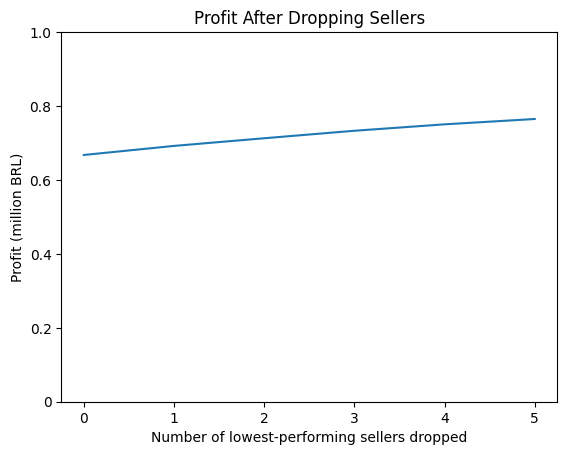

In [8]:
five_rev = how_many_to_drop(5)

### Finding the best number to drop

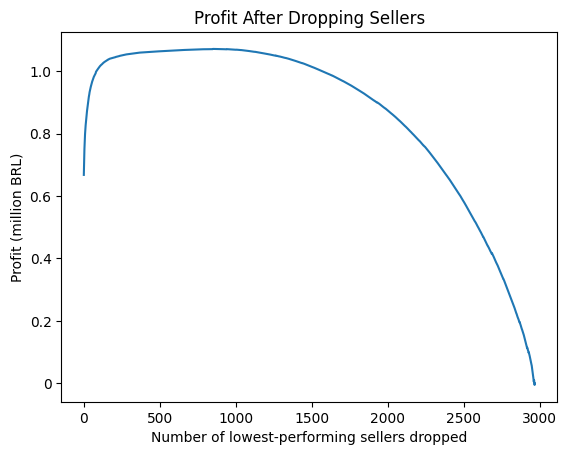

In [9]:
all_rev = how_many_to_drop(2967)

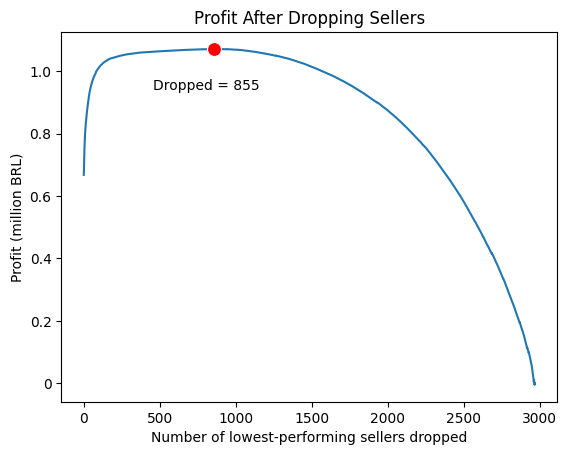

In [10]:
max_val = max(all_rev.values())
max_key = max(all_rev, key=all_rev.get)
current_rev = sellers['profits'].sum() - (a*np.sqrt(len(sellers)) + b*np.sqrt(sellers['quantity'].sum()))
sns.lineplot(x=all_rev.keys(), y=all_rev.values())
plt.annotate(f"Dropped = {max_key}", (max_key-400,max_val-130000))
# plt.annotate(f"increase = {round(max_val-current_rev, 2)} BRL", (max_key-65,max_val-2000))
sns.lineplot(x={'max': max_key}, y={'max': max_val}, marker='o', markersize=10, markerfacecolor='red')
y_ticks = range(0,1150000, 200000)
y_tick_labels = (0, .2, .4, .6, .8, 1.0)
plt.yticks(y_ticks, y_tick_labels)
plt.title("Profit After Dropping Sellers")
plt.xlabel("Number of lowest-performing sellers dropped")
plt.ylabel("Profit (million BRL)")
plt.show()

### Increase in profit

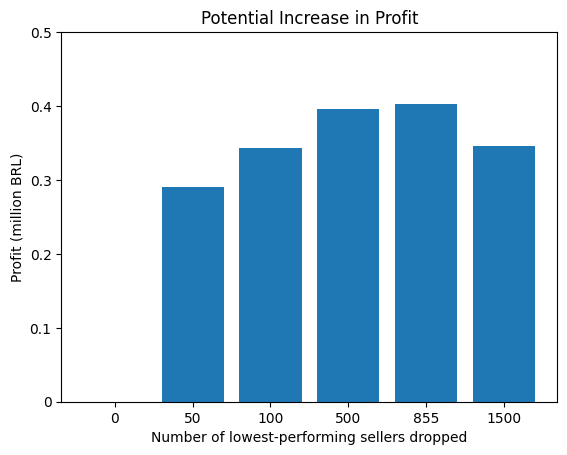

In [11]:
bar_dict = {}
bar_dict['0']=all_rev[0]-all_rev[0]
bar_dict['50']=all_rev[50]-all_rev[0]
bar_dict['100']=all_rev[100]-all_rev[0]
bar_dict['500']=all_rev[500]-all_rev[0]
bar_dict['855']=all_rev[855]-all_rev[0]
bar_dict['1500']=all_rev[1500]-all_rev[0]


# all_rev[[0, 50, 100, 500, 855, 1500]]
plt.bar(x=bar_dict.keys(), height=bar_dict.values())
y_ticks = range(0,600000, 100000)
y_tick_labels = (0, .1, .2, .3, .4, .5)
plt.yticks(y_ticks, y_tick_labels)
plt.title("Potential Increase in Profit")
plt.xlabel("Number of lowest-performing sellers dropped")
plt.ylabel("Profit (million BRL)")
plt.show()
# all_rev

In [12]:
all_rev[855]-all_rev[0]

403366.9905356277

## inc of ~403k BRL possible

### $IT\_costs = \alpha * \sqrt{n\_sellers} + \beta * \sqrt{n\_products}$

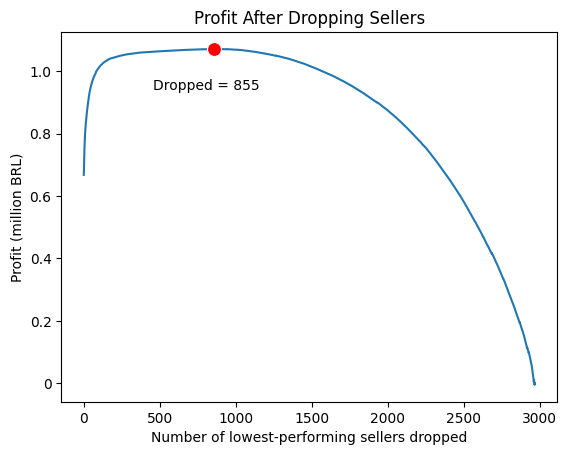

In [13]:
max_val = max(all_rev.values())
max_key = max(all_rev, key=all_rev.get)
current_rev = sellers['profits'].sum() - (a*np.sqrt(len(sellers)) + b*np.sqrt(sellers['quantity'].sum()))
sns.lineplot(x=all_rev.keys(), y=all_rev.values())
plt.annotate(f"Dropped = {max_key}", (max_key-400,max_val-130000))
# plt.annotate(f"increase = {round(max_val-current_rev, 2)} BRL", (max_key-65,max_val-2000))
sns.lineplot(x={'max': max_key}, y={'max': max_val}, marker='o', markersize=10, markerfacecolor='red')
y_ticks = range(0,1150000, 200000)
y_tick_labels = (0, .2, .4, .6, .8, 1.0)
plt.yticks(y_ticks, y_tick_labels)
plt.title("Profit After Dropping Sellers")
plt.xlabel("Number of lowest-performing sellers dropped")
plt.ylabel("Profit (million BRL)")
plt.show()

### scaling from here...

## Possible Solution 2: Conditionally On-board New Sellers

## Hard to predict quantity each seller will move

## but there is a strong correlation between:
### distance to customer --> wait time
### wait time --> review score

### (Profit per seller) = (total sales) 
###                                  + (months on Olist * 80) 
###                                  - (cost of reviews)

## Map out profitability of sellers by state 

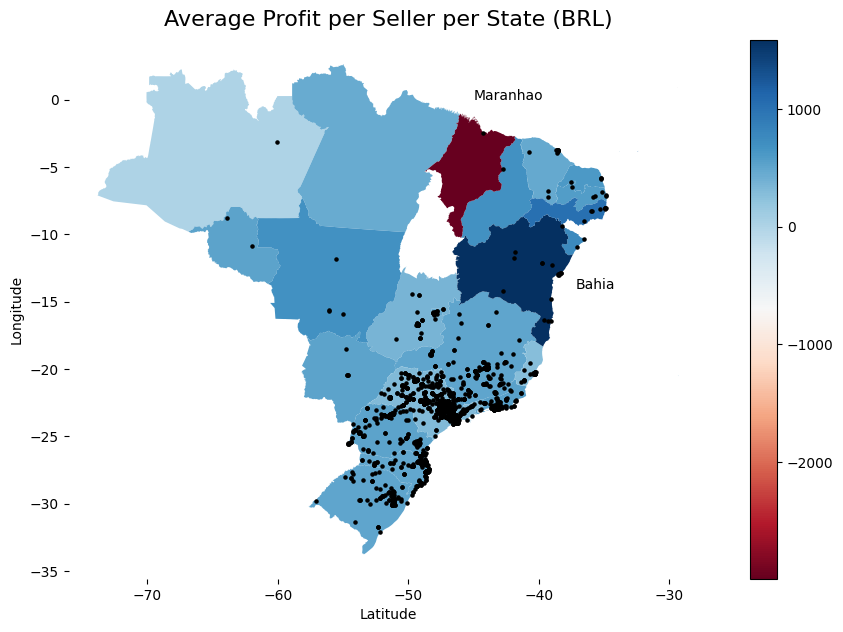

In [31]:
import geopandas as gpd
from olist.order import Order

orders = Order().get_training_data()

orders_sellers = orders.merge(data['order_items'], how='inner', on='order_id').merge(data['sellers'], how='inner', on='seller_id').merge(data['geolocation'], how='inner', left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
orders_sellers.keys()

sellers_geo = orders_sellers.groupby('seller_id', as_index=False).agg(avg_dist_to_cust=('distance_seller_customer', 'mean'), lat=('geolocation_lat', 'mean'), lon=('geolocation_lng', 'mean'))

sellers_geo_fin = sellers_geo.merge(sellers, how='inner', on='seller_id')

coord = sellers_geo_fin[['lat', 'lon', 'profits', 'wait_time', 'seller_state']]

profits_state = coord.groupby('seller_state').agg(profit_by_state=('profits', 'mean'))

brazil = gpd.read_file('data/brazil.gpkg')

import warnings
warnings.filterwarnings('ignore')

brazil.rename({"sigla": 'seller_state'}, axis=1, inplace=True)
brazil_prof = brazil.merge(profits_state, on='seller_state', how='left')
brazil_prof = brazil_prof[['seller_state', 'profit_by_state', 'geometry']]
brazil_prof['center_x'] = brazil_prof['geometry'].map(lambda c: c.centroid.x)
brazil_prof['center_y'] = brazil_prof['geometry'].map(lambda c: c.centroid.y)

fig, ax = plt.subplots(figsize=(11,7))

brazil_prof.plot(column = "profit_by_state",
                   cmap='RdBu',
                   legend=True, 
                   ax=ax,
                   label='Average profit per state')
coord.plot(ax = ax, x='lon', y='lat', marker = '.', color = "black", kind='scatter', cmap='RdBu')
# ax.set_axis_off()


ax.set_title('Average Profit per Seller per State (BRL)', pad=10, size=16)
ax.set_xlabel("Latitude")#, labelpad=10)
ax.set_ylabel("Longitude")#, labelpad=10)

ax.annotate("Maranhao", xy=(-45, 0))
ax.annotate("Bahia", (-37.199415, -14.066059))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

### Some limitations:
###    - Not enough data
###    - Assumes wait time due to logistics

### But might be worth considering limiting by seller location

# Thank You 